In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
drivers = pd.read_csv("driver-data.csv")

In [5]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
drivers.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [8]:
drivers.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters=2)

In [12]:
d_ana = drivers.drop("id",axis=1)

In [13]:
d_ana

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [14]:
km.fit(d_ana)

KMeans(n_clusters=2)

In [16]:

km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [17]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
print(len(km.labels_))

4000


In [19]:
unique,counts = np.unique(km.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


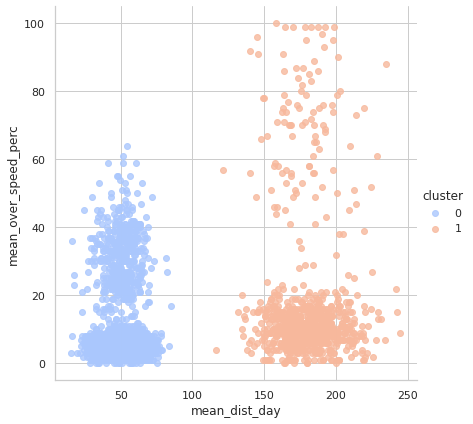

In [24]:
d_ana["cluster"] = km.labels_
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=d_ana,hue="cluster",palette="coolwarm",size=6,aspect=1,fit_reg=False)